In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
pie_pumpkins = pd.read_csv('US-pumpkins.csv')
pie_pumpkins['Date'] = pd.to_datetime(pie_pumpkins['Date'], format='%m/%d/%y', errors='coerce')
pie_pumpkins['DayOfYear'] = pie_pumpkins['Date'].dt.dayofyear
pie_pumpkins['Price'] = (pie_pumpkins['Low Price'] + pie_pumpkins['High Price']) / 2


In [49]:
numeric_cols = ['DayOfYear', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High', 'Price']
df_numeric = pie_pumpkins[numeric_cols].dropna()
correlation_matrix = df_numeric.corr()


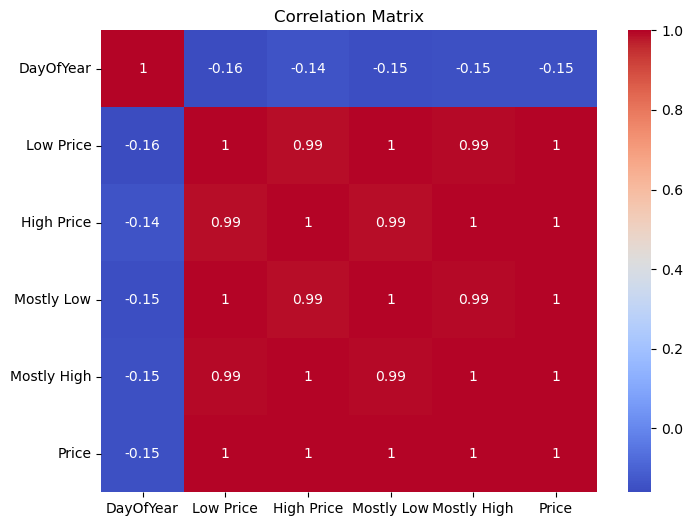

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


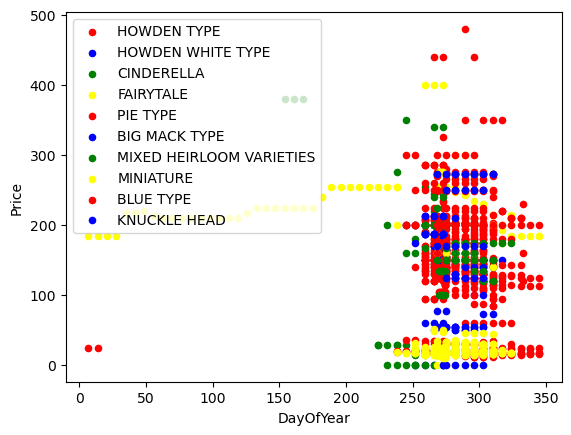

In [52]:
new_pumpkins = pie_pumpkins[['Variety', 'DayOfYear', 'Price']].dropna()
ax = None
colors = ['red', 'blue', 'green', 'yellow']
for i, var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety'] == var]
    ax = df.plot.scatter('DayOfYear', 'Price', ax=ax, c=colors[i % len(colors)], label=var)


In [64]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE'].copy()
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()



<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 70 to 1708
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Variety    468 non-null    object 
 1   DayOfYear  468 non-null    int32  
 2   Price      468 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 12.8+ KB


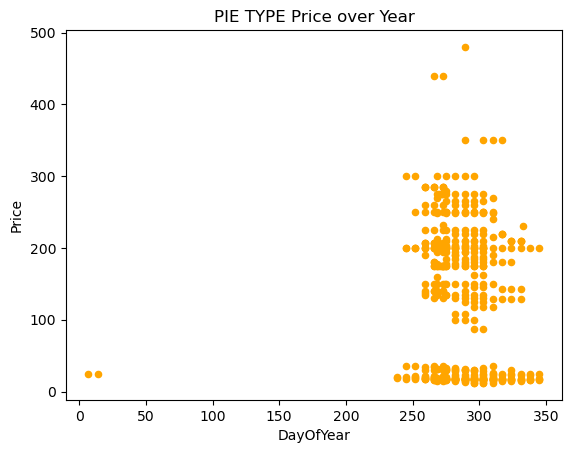

In [61]:
pie_pumpkins.plot.scatter('DayOfYear', 'Price', color='orange', title='PIE TYPE Price over Year')
plt.show()
